In [1]:
import numpy as np
import pydotplus as pydotplus
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Task 1

Write a `get_features_targets` function that splits the training data into input features and their corresponding targets. In our case, the inputs are the 4 colour indices and our targets are the corresponding redshifts.

In [2]:
def get_features_targets(data):
    features = np.zeros((data.shape[0], 4))
    features[:, 0] = data['u'] - data['g']
    features[:, 1] = data['g'] - data['r']
    features[:, 2] = data['r'] - data['i']
    features[:, 3] = data['i'] - data['z']
    
    return features, data['redshift']


def main():
    data = np.load('data1/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    print(features[:2])
    print(targets[:2])


main()

[[0.31476 0.0571  0.28991 0.07192]
 [1.2002  0.82026 0.45294 0.24665]]
[0.539301  0.1645703]


# Task 2

In [3]:
def main():
    # load the data and generate the features and targets
    data = np.load('data1/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor()
    
    # train the model
    dtr.fit(features, targets)
    
    # make predictions using the same features
    predictions = dtr.predict(features)
    
    # print out the first 4 predicted redshifts
    print(predictions[:4])


main()

[0.539301   0.1645703  0.04190006 0.04427702]


# Task 3

In this problem we will implement the function `median_diff`. The function should calculate the median residual error of our model, i.e. the median difference between our predicted and actual redshifts.

The `median_diff` function takes two arguments – the predicted and actual/target values. When we use this function later in the tutorial, these will corresponding to the predicted redshifts from our decision tree and their corresponding measured/target values.

In [4]:
def median_diff(predicted, actual):
    return np.median(np.abs(predicted - actual))


def main():
    targets = np.load('data1/targets.npy')
    predictions = np.load('data1/predictions.npy')
    diff = median_diff(predictions, targets)
    print("Median difference: {:0.3f}".format(diff))


# The data wasn't provided
if __name__ == "__tbd__":
    main()

# Task 4

In this problem, we will use `median_diff` from the previous question to validate the decision tree model. Your task is to complete the `validate_model` function.

In [5]:
# write a function that splits the data into training and testing subsets
# trains the model and returns the prediction accuracy with median_diff
def validate_model(model, features, targets):
    # split the data into training and testing features and predictions
    split = 2*features.shape[0]//3
    train_features = features[:split]
    test_features = features[split:]
    
    train_targets = targets[:split]
    test_targets = targets[split:]

    # train the model
    model.fit(train_features, train_targets)

    # get the predicted_redshifts
    predictions = model.predict(test_features)
  
    # use median_diff function to calculate the accuracy
    return median_diff(test_targets, predictions)


def main():
    data = np.load('data1/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # initialize model
    dtr = DecisionTreeRegressor()

    # validate the model and print the med_diff
    diff = validate_model(dtr, features, targets)
    print('Median difference: {:f}'.format(diff))


main()

Median difference: 0.021610


# Plot the decision tree (optional activity)

In [6]:
def main():
    data = np.load('data1/sdss_galaxy_colors.npy')
    features, targets = get_features_targets(data)

    # Initialize model
    dtr = DecisionTreeRegressor(max_depth=3)    # We will come to this input in the next tutorial

    # Split the data into training and testing
    split_index = int(0.5 * len(features))
    train_features = features[:split_index]
    train_targets = targets[:split_index]

    dtr.fit(train_features, train_targets)

    dot_data = export_graphviz(dtr, out_file=None,feature_names=['u - g', 'g - r', 'r - i', 'i - z'])
    graph = pydotplus.graph_from_dot_data(dot_data)
    graph.write_jpg("decision_tree.jpg")


main()

# Task 5

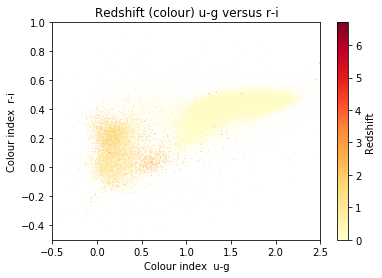

In [7]:
def main():
    data = np.load('data1/sdss_galaxy_colors.npy')
    # Get a colour map
    cmap = plt.get_cmap('YlOrRd')

    # Define our colour indexes u-g and r-i
    u_g = data['u'] - data['g']
    r_i = data['r'] - data['i']

    # Make a redshift array
    redshift = data['redshift']

    # Create the plot with plt.scatter
    plot = plt.scatter(u_g, r_i, s=0.5, lw=0, c=redshift, cmap=cmap)

    cb = plt.colorbar(plot)
    cb.set_label('Redshift')

    # Define your axis labels and plot title
    plt.xlabel('Colour index  u-g')
    plt.ylabel('Colour index  r-i')
    plt.title('Redshift (colour) u-g versus r-i')

    # Set any axis limits
    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1)

    plt.show()


main()